In [24]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# reading data with race breakdown
covrace = pd.read_csv("Race Data Entry - CRDT.csv")

In [4]:
covrace.describe()

,Date,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
count,56.0,55.000000,49.000000,48.000000,22.000000,45.000000,33.000000,22.000000,16.000000,47.000000,...,23.000000,42.000000,29.000000,16.000000,13.000000,44.000000,56.000000,46.000000,46.000000,47.000000
mean,20200708.0,55363.254545,13774.673469,7056.395833,19174.045455,1223.644444,696.545455,311.818182,810.687500,3146.659574,...,767.826087,118.619048,29.689655,8.125000,20.153846,94.181818,201.125000,413.695652,2056.608696,277.638298
std,0.0,77482.973628,11702.605012,8185.509438,23953.140859,1921.232289,1647.820646,441.113055,1247.110245,4858.267325,...,1486.194030,305.176794,71.130716,8.484299,27.131919,283.979304,557.957707,1100.524297,3302.057954,623.874828
min,20200708.0,31.000000,34.000000,6.000000,212.000000,2.000000,2.000000,2.000000,0.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,20200708.0,8857.000000,3944.000000,937.250000,4802.000000,177.000000,78.000000,32.500000,206.500000,395.500000,...,66.500000,7.250000,3.000000,2.500000,2.000000,8.000000,9.500000,28.750000,342.000000,20.500000
50%,20200708.0,26755.000000,11220.000000,3066.000000,11490.000000,714.000000,225.000000,116.000000,357.500000,1643.000000,...,198.000000,18.000000,8.000000,5.500000,11.000000,17.000000,45.000000,64.000000,798.000000,67.000000
75%,20200708.0,68763.000000,21204.000000,11604.500000,22386.000000,1353.000000,381.000000,324.750000,747.500000,3676.500000,...,510.000000,71.000000,20.000000,11.250000,27.000000,38.500000,113.250000,202.500000,2703.500000,186.500000
max,20200708.0,398929.000000,47725.000000,31944.000000,101464.000000,11635.000000,7419.000000,1653.000000,5034.000000,29384.000000,...,6591.000000,1683.000000,320.000000,28.000000,101.000000,1804.000000,2988.000000,6591.000000,18288.000000,2988.000000


In [15]:
# creating new feature of percentage of black cases out of total
covrace['perc_bl'] = covrace.Cases_Black/covrace.Cases_Total * 100

In [29]:
covrace.columns

Index(['Date', 'State', 'Cases_Total', 'Cases_White', 'Cases_Black',
       'Cases_LatinX', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI',
       'Cases_Multiracial', 'Cases_Other', 'Cases_Unknown',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Unknown', 'Deaths_Total', 'Deaths_White',
       'Deaths_Black', 'Deaths_LatinX', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial', 'Deaths_Other', 'Deaths_Unknown',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown', 'perc_bl'],
      dtype='object')

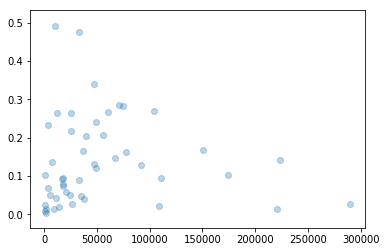

In [20]:
plt.scatter(covrace.Cases_Total, covrace.perc_bl, alpha=0.3,
            cmap='viridis')

In [30]:
fig = px.scatter(covrace, x="Cases_Total", y="perc_bl", log_x=True, hover_name="State")

fig.show()

In [31]:
covrace['perc_bl_d'] = covrace.Deaths_Black/covrace.Deaths_Total * 100
fig = px.scatter(covrace, x="Deaths_Total", y="perc_bl_d", log_x=True, hover_name="State")

fig.show()

In [33]:
countydata = pd.read_csv("Provisional_COVID-19_Death_Counts_by_County_and_Race.csv")

In [36]:
countydata.head()

,Data as of,State,County Name,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,All Deaths Total,COVID-19 Deaths Total,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Other,Hispanic,Urban Rural Description,Footnote
0,07/08/2020,AL,Jefferson County,1,1,73,1073,Distribution of all-cause deaths (%),4028,191,0.630,0.351,0.000,0.005,0.003,0.011,Large central metro,Data based on counts less than 10 suppressed
1,07/08/2020,AL,Jefferson County,1,1,73,1073,Distribution of COVID-19 deaths (%),4028,191,0.539,0.435,0.000,0.000,0.000,0.000,Large central metro,Data based on counts less than 10 suppressed
2,07/08/2020,AL,Jefferson County,1,1,73,1073,Distribution of population (%),4028,191,0.497,0.431,0.002,0.018,0.012,0.040,Large central metro,NaN
3,07/08/2020,AL,Mobile County,3,1,97,1097,Distribution of all-cause deaths (%),2198,174,0.661,0.317,0.007,0.007,0.000,0.005,Medium metro,Data based on counts less than 10 suppressed
4,07/08/2020,AL,Mobile County,3,1,97,1097,Distribution of COVID-19 deaths (%),2198,174,0.448,0.523,0.000,0.000,0.000,0.000,Medium metro,Data based on counts less than 10 suppressed
